# ساخت دیتای مورد نیاز برای ماشین لرنینگ

## وارد کردن کتابخانه ها

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## خواند فایل های اصلی مساله

### خواند دیتای سال های کوچکتر از 2022

In [2]:
df_estimates = pd.read_excel('../../data/naive_data/WPP2022.xlsx', sheet_name='Estimates', skiprows=16, na_values='...')
# انتخاب تایپ از نوع کشور
df_estimates = df_estimates[df_estimates['Type'] == 'Country/Area'].copy()

# انتخاب ستون های با کوریلیشن کمتر از 0.9
column_list = ["Region, subregion, country or area *",
               "ISO3 Alpha-code",
               "Parent code",
               "Year",
               "Births (thousands)",
               "Population Density, as of 1 July (persons per square km)",
               "Population Sex Ratio, as of 1 July (males per 100 females)",
               "Population Growth Rate (percentage)",
               "Population Annual Doubling Time (years)",
               "Rate of Natural Change (per 1,000 population)",
               "Crude Birth Rate (births per 1,000 population)",
               "Mean Age Childbearing (years)",
               "Sex Ratio at Birth (males per 100 female births)",
               "Crude Death Rate (deaths per 1,000 population)",
               "Under-Five Deaths, under age 5 (thousands)",
               "Net Number of Migrants (thousands)",
               "Net Migration Rate (per 1,000 population)",
               "Life Expectancy at Birth, both sexes (years)"]

df_estimates = df_estimates[column_list].copy()

# حدف مقادیر تکراری
df_estimates.drop_duplicates(subset=['Region, subregion, country or area *', "Year"], keep='first', inplace=True)
df_estimates.reset_index(drop=True, inplace=True)
df_estimates.head()

,"Region, subregion, country or area *",ISO3 Alpha-code,Parent code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,910,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579
1,Burundi,BDI,910,1951.0,117.067,88.757,92.145,2.114,32.788,26.799,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,40.812
2,Burundi,BDI,910,1952.0,117.770,90.618,92.319,2.036,34.045,26.118,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,41.003
3,Burundi,BDI,910,1953.0,119.013,92.451,92.488,1.969,35.203,25.844,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,41.282
4,Burundi,BDI,910,1954.0,119.972,94.287,92.650,1.965,35.275,25.536,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,41.558


### خواند دیتای سال های بزرگتر و مساوی با 2022

In [3]:
df_medium = pd.read_excel('../../data/naive_data/WPP2022.xlsx', sheet_name='Medium variant', skiprows=16,
                          na_values='...')

# انتخاب تایپ از نوع کشور
df_medium = df_medium[df_medium['Type'] == 'Country/Area'].copy()

# انتخاب ستون های با کوریلیشن کمتر از 0.9
df_medium = df_medium[column_list].copy()

# انتخاب سال 2022
df_medium = df_medium[df_medium['Year'] >= 2022].copy()
df_medium.reset_index(drop=True, inplace=True)

# حدف مقادیر تکراری
df_medium.drop_duplicates(subset=['Region, subregion, country or area *', "Year"], keep='first', inplace=True)
df_medium.reset_index(drop=True, inplace=True)
df_medium.head()

,"Region, subregion, country or area *",ISO3 Alpha-code,Parent code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,910,2022.0,439.648,496.708,98.648,2.695,25.720,26.798,34.109,30.652,102.5,7.311,22.214,2.0,0.155,61.977
1,Burundi,BDI,910,2023.0,443.059,510.156,98.681,2.648,26.176,26.329,33.467,30.638,102.5,7.138,22.966,2.0,0.151,62.500
2,Burundi,BDI,910,2024.0,447.212,523.763,98.700,2.617,26.486,26.017,32.902,30.625,102.5,6.885,23.280,2.0,0.147,63.266
3,Burundi,BDI,910,2025.0,450.531,537.501,98.709,2.562,27.055,25.474,32.300,30.612,102.4,6.826,23.136,2.0,0.143,63.446
4,Burundi,BDI,910,2026.0,457.042,551.361,98.714,2.530,27.397,25.162,31.941,30.599,102.4,6.779,23.086,2.0,0.140,63.621


### تجمیع دو دیتا

In [4]:
df_base_data = pd.concat([df_estimates, df_medium], axis=0)
df_base_data.rename(columns={'Region, subregion, country or area *': 'Country'}, inplace=True)
df_base_data

,Country,ISO3 Alpha-code,Parent code,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,910,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579
1,Burundi,BDI,910,1951.0,117.067,88.757,92.145,2.114,32.788,26.799,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,40.812
2,Burundi,BDI,910,1952.0,117.770,90.618,92.319,2.036,34.045,26.118,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,41.003
3,Burundi,BDI,910,1953.0,119.013,92.451,92.488,1.969,35.203,25.844,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,41.282
4,Burundi,BDI,910,1954.0,119.972,94.287,92.650,1.965,35.275,25.536,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,41.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18718,Wallis and Futuna Islands,WLF,957,2096.0,0.086,72.050,99.033,-0.476,NaN,-3.505,8.504,30.461,104.8,12.009,0.000,-0.010,-0.991,89.180
18719,Wallis and Futuna Islands,WLF,957,2097.0,0.086,71.686,99.048,-0.538,NaN,-3.699,8.533,30.476,104.8,12.232,0.000,-0.010,-0.995,89.280
18720,Wallis and Futuna Islands,WLF,957,2098.0,0.085,71.350,99.063,-0.400,NaN,-3.905,8.516,30.491,104.8,12.421,0.000,-0.010,-1.000,89.409
18721,Wallis and Futuna Islands,WLF,957,2099.0,0.085,71.000,99.099,-0.584,NaN,-4.102,8.529,30.507,104.8,12.631,0.000,-0.010,-1.005,89.511


### اضافه کردن subregion

In [5]:
df_subregion = pd.read_csv('../../data/WPP2022/region_type/Subregion.csv')
df_subregion = df_subregion[['Region, subregion, country or area *',
                             'Location code',
                             'Parent code']].copy()
df_subregion.drop_duplicates(keep='first', inplace=True)
df_subregion.rename(columns={'Region, subregion, country or area *': 'subregion',
                             "Parent code": "region code",
                             "Location code": "subregion code"}, inplace=True)
df_subregion

,subregion,subregion code,region code
0,Eastern Africa,910,903
72,Middle Africa,911,903
144,Northern Africa,912,903
216,Southern Africa,913,903
288,Western Africa,914,903
360,Central Asia,5500,935
432,Eastern Asia,906,935
504,Southern Asia,5501,935
576,South-Eastern Asia,920,935
648,Western Asia,922,935


In [6]:
df_base_data = pd.merge(left=df_base_data,
                        right=df_subregion,
                        left_on='Parent code',
                        right_on="subregion code",
                        how='left')
df_base_data = df_base_data[['Country',
                             "ISO3 Alpha-code",
                             'subregion',
                             'region code',
                             'Year',
                             'Births (thousands)',
                             'Population Density, as of 1 July (persons per square km)',
                             'Population Sex Ratio, as of 1 July (males per 100 females)',
                             'Population Growth Rate (percentage)',
                             'Population Annual Doubling Time (years)',
                             'Rate of Natural Change (per 1,000 population)',
                             'Crude Birth Rate (births per 1,000 population)',
                             'Mean Age Childbearing (years)',
                             'Sex Ratio at Birth (males per 100 female births)',
                             'Crude Death Rate (deaths per 1,000 population)',
                             'Under-Five Deaths, under age 5 (thousands)',
                             'Net Number of Migrants (thousands)',
                             'Net Migration Rate (per 1,000 population)',
                             'Life Expectancy at Birth, both sexes (years)']]


### اضافه کردن region

In [7]:
df_region = pd.read_csv('../../data/WPP2022/region_type/Region.csv')
df_region = df_region[['Region, subregion, country or area *',
                       'Location code']].copy()
df_region.drop_duplicates(keep='first', inplace=True)
df_region.rename(columns={'Region, subregion, country or area *': 'region'}, inplace=True)
df_region

,region,Location code
0,AFRICA,903
72,ASIA,935
144,EUROPE,908
216,LATIN AMERICA AND THE CARIBBEAN,904
288,NORTHERN AMERICA,905
360,OCEANIA,909


In [8]:
df_base_data = pd.merge(left=df_base_data,
                        right=df_region,
                        left_on='region code',
                        right_on="Location code",
                        how='left')
df_base_data = df_base_data[['Country',
                             "ISO3 Alpha-code",
                             'subregion',
                             'region',
                             'Year',
                             'Births (thousands)',
                             'Population Density, as of 1 July (persons per square km)',
                             'Population Sex Ratio, as of 1 July (males per 100 females)',
                             'Population Growth Rate (percentage)',
                             'Population Annual Doubling Time (years)',
                             'Rate of Natural Change (per 1,000 population)',
                             'Crude Birth Rate (births per 1,000 population)',
                             'Mean Age Childbearing (years)',
                             'Sex Ratio at Birth (males per 100 female births)',
                             'Crude Death Rate (deaths per 1,000 population)',
                             'Under-Five Deaths, under age 5 (thousands)',
                             'Net Number of Migrants (thousands)',
                             'Net Migration Rate (per 1,000 population)',
                             'Life Expectancy at Birth, both sexes (years)']]
df_base_data

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,26.799,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,26.118,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,25.844,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,25.536,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,41.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35782,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2096.0,0.086,72.050,99.033,-0.476,NaN,-3.505,8.504,30.461,104.8,12.009,0.000,-0.010,-0.991,89.180
35783,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2097.0,0.086,71.686,99.048,-0.538,NaN,-3.699,8.533,30.476,104.8,12.232,0.000,-0.010,-0.995,89.280
35784,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2098.0,0.085,71.350,99.063,-0.400,NaN,-3.905,8.516,30.491,104.8,12.421,0.000,-0.010,-1.000,89.409
35785,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2099.0,0.085,71.000,99.099,-0.584,NaN,-4.102,8.529,30.507,104.8,12.631,0.000,-0.010,-1.005,89.511


## خواند دیتای مربوط به اطلاعات بیشتر

### GDP

In [9]:
df_gdp = pd.read_csv('../../data/initial_cleaning/initial_cleaning_gdp.csv')

# merge into base data
df = pd.merge(left=df_base_data,
              right=df_gdp,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO3 Alpha-code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_GDP'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",GDP,_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,30.996,102.5,23.879,30.669,-13.217,-5.721,40.812,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,31.026,102.5,23.815,31.272,-13.715,-5.815,41.003,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,31.030,102.5,23.604,31.644,-14.962,-6.216,41.282,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,31.036,102.5,23.347,31.915,-14.599,-5.948,41.558,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38882,NaN,TMN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Middle East & North Africa (IDA & IBRD countries),3564.066025,right_only
38883,NaN,TSA,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia (IDA & IBRD),2149.821595,right_only
38884,NaN,TSS,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa (IDA & IBRD countries),1626.277926,right_only
38885,NaN,UMC,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,10828.050690,right_only


#### بررسی دیتاهای موجود در gdp و ناموجود در دیتای اصلی

In [10]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Central Europe and the Baltics', 'Channel Islands',
       'Caribbean small states',
       'East Asia & Pacific (excluding high income)',
       'Early-demographic dividend', 'East Asia & Pacific',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia', 'Euro area', 'European Union',
       'Fragile and conflict affected situations', 'High income',
       'Heavily indebted poor countries (HIPC)', 'IBRD only',
       'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only',
       'Not classified',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Late-demographic dividend', 'Middle East & North Africa',
       'Middle income',
       'Middle East & North Africa (excluding high income)',
     

#### حذف دیتای اضافی

In [11]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,26.799,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,26.118,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,25.844,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,25.536,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,NaN,41.558


### educated population

In [12]:
df_ep = pd.read_csv('../../data/initial_cleaning/initial_cleaning_educated_population.csv')

# merge into base data
df = pd.merge(left=df_base_data,
              right=df_ep,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO-alpha3 code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_EP'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",ISO-alpha3 code,Educated_Population,_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,23.546,29.001,-13.343,-5.893,NaN,40.579,NaN,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,23.879,30.669,-13.217,-5.721,NaN,40.812,NaN,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,23.815,31.272,-13.715,-5.815,NaN,41.003,NaN,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,23.604,31.644,-14.962,-6.216,NaN,41.282,NaN,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,23.347,31.915,-14.599,-5.948,NaN,41.558,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38332,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,SSF,NaN,right_only
38333,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa (excluding high income),SSA,NaN,right_only
38334,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa (IDA & IBRD countries),TSS,NaN,right_only
38335,NaN,NaN,NaN,NaN,2020.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,UMC,NaN,right_only


#### بررسی دیتاهای موجود در Educated_population و ناموجود در دیتای اصلی

In [13]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Channel Islands',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Global Partnership for Education',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Lending category not classified', 'Low & middle income',
 

#### حذف دیتای اضافی

In [14]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,NaN,NaN,41.558


### Suicide

In [15]:
df_suicide = pd.read_csv('../../data/initial_cleaning/initial_cleaning_suicide.csv')

# merge into base data
df = pd.merge(left=df_base_data,
              right=df_suicide,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO3 Alpha-code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_S'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",Suicide,_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,23.546,29.001,-13.343,-5.893,NaN,NaN,40.579,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,23.879,30.669,-13.217,-5.721,NaN,NaN,40.812,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,23.815,31.272,-13.715,-5.815,NaN,NaN,41.003,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,23.604,31.644,-14.962,-6.216,NaN,NaN,41.282,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,23.347,31.915,-14.599,-5.948,NaN,NaN,41.558,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43102,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2096.0,0.086,72.050,99.033,-0.476,NaN,...,12.009,0.000,-0.010,-0.991,NaN,NaN,89.180,NaN,NaN,left_only
43103,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2097.0,0.086,71.686,99.048,-0.538,NaN,...,12.232,0.000,-0.010,-0.995,NaN,NaN,89.280,NaN,NaN,left_only
43104,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2098.0,0.085,71.350,99.063,-0.400,NaN,...,12.421,0.000,-0.010,-1.000,NaN,NaN,89.409,NaN,NaN,left_only
43105,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2099.0,0.085,71.000,99.099,-0.584,NaN,...,12.631,0.000,-0.010,-1.005,NaN,NaN,89.511,NaN,NaN,left_only


#### بررسی دیتاهای موجود در Suicide و ناموجود در دیتای اصلی

In [16]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array([], dtype=object)

#### حذف دیتای اضافی

In [17]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Suicide',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,30.995,102.5,23.546,29.001,-13.343,-5.893,NaN,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,30.996,102.5,23.879,30.669,-13.217,-5.721,NaN,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,31.026,102.5,23.815,31.272,-13.715,-5.815,NaN,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,31.030,102.5,23.604,31.644,-14.962,-6.216,NaN,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,31.036,102.5,23.347,31.915,-14.599,-5.948,NaN,NaN,NaN,41.558


### hiv

In [18]:
df_hiv = pd.read_csv('../../data/initial_cleaning/initial_cleaning_hiv.csv')

# ISO-alpha3 code
# merge into base data
df = pd.merge(left=df_base_data,
              right=df_hiv,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO-alpha3 code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_HIV'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",ISO-alpha3 code,HIV,_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,-13.343,-5.893,NaN,NaN,NaN,40.579,NaN,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,-13.217,-5.721,NaN,NaN,NaN,40.812,NaN,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,-13.715,-5.815,NaN,NaN,NaN,41.003,NaN,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,-14.962,-6.216,NaN,NaN,NaN,41.282,NaN,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,-14.599,-5.948,NaN,NaN,NaN,41.558,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44702,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa,SSF,..,right_only
44703,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa (excluding high income),SSA,..,right_only
44704,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sub-Saharan Africa (IDA & IBRD countries),TSS,..,right_only
44705,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Upper middle income,UMC,..,right_only


#### بررسی دیتاهای موجود در HIV و ناموجود در دیتای اصلی

In [19]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Channel Islands',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income

#### حذف دیتای اضافی

In [20]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Suicide',
       'HIV',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,102.5,23.546,29.001,-13.343,-5.893,NaN,NaN,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,102.5,23.879,30.669,-13.217,-5.721,NaN,NaN,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,102.5,23.815,31.272,-13.715,-5.815,NaN,NaN,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,102.5,23.604,31.644,-14.962,-6.216,NaN,NaN,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,102.5,23.347,31.915,-14.599,-5.948,NaN,NaN,NaN,NaN,41.558


### bmi

In [21]:
df_bmi = pd.read_csv('../../data/initial_cleaning/initial_cleaning_bmi.csv')

# ISO-alpha3 cod
# merge into base data
df = pd.merge(left=df_base_data,
              right=df_bmi,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO3 Alpha-code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_bmi'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",BMI,_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,-13.343,-5.893,NaN,NaN,NaN,NaN,40.579,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,-13.217,-5.721,NaN,NaN,NaN,NaN,40.812,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,-13.715,-5.815,NaN,NaN,NaN,NaN,41.003,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,-14.962,-6.216,NaN,NaN,NaN,NaN,41.282,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,-14.599,-5.948,NaN,NaN,NaN,NaN,41.558,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43606,NaN,SDF,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudan (former),24.1,right_only
43607,NaN,SDF,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudan (former),23.9,right_only
43608,NaN,SDF,NaN,NaN,2014.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudan (former),23.9,right_only
43609,NaN,SDF,NaN,NaN,2015.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sudan (former),24.7,right_only


#### بررسی دیتاهای موجود در BMI و ناموجود در دیتای اصلی

In [22]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array([nan, 'Sudan (former)'], dtype=object)

#### حذف دیتای اضافی

In [23]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Suicide',
       'HIV',
       'BMI',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,BMI,"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,23.546,29.001,-13.343,-5.893,NaN,NaN,NaN,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,23.879,30.669,-13.217,-5.721,NaN,NaN,NaN,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,23.815,31.272,-13.715,-5.815,NaN,NaN,NaN,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,23.604,31.644,-14.962,-6.216,NaN,NaN,NaN,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,23.347,31.915,-14.599,-5.948,NaN,NaN,NaN,NaN,NaN,41.558


### darmani

In [24]:
df_darmani = pd.read_csv('../../data/initial_cleaning/initial_cleaning_darmani.csv')

# ISO-alpha3 cod
# merge into base data
df = pd.merge(left=df_base_data,
              right=df_darmani,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO3 Alpha-code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_darmani'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,BMI,"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",darmani*,_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,-5.893,NaN,NaN,NaN,NaN,NaN,40.579,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,-5.721,NaN,NaN,NaN,NaN,NaN,40.812,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,-5.815,NaN,NaN,NaN,NaN,NaN,41.003,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,-6.216,NaN,NaN,NaN,NaN,NaN,41.282,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,-5.948,NaN,NaN,NaN,NaN,NaN,41.558,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43102,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2096.0,0.086,72.050,99.033,-0.476,NaN,...,-0.991,NaN,NaN,NaN,NaN,NaN,89.180,NaN,NaN,left_only
43103,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2097.0,0.086,71.686,99.048,-0.538,NaN,...,-0.995,NaN,NaN,NaN,NaN,NaN,89.280,NaN,NaN,left_only
43104,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2098.0,0.085,71.350,99.063,-0.400,NaN,...,-1.000,NaN,NaN,NaN,NaN,NaN,89.409,NaN,NaN,left_only
43105,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2099.0,0.085,71.000,99.099,-0.584,NaN,...,-1.005,NaN,NaN,NaN,NaN,NaN,89.511,NaN,NaN,left_only


#### بررسی دیتاهای موجود در darmani و ناموجود در دیتای اصلی

In [25]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array([], dtype=object)

#### حذف دیتای اضافی

In [26]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Suicide',
       'HIV',
       'BMI',
       'darmani*',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,BMI,darmani*,"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,29.001,-13.343,-5.893,NaN,NaN,NaN,NaN,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,30.669,-13.217,-5.721,NaN,NaN,NaN,NaN,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,31.272,-13.715,-5.815,NaN,NaN,NaN,NaN,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,31.644,-14.962,-6.216,NaN,NaN,NaN,NaN,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,31.915,-14.599,-5.948,NaN,NaN,NaN,NaN,NaN,NaN,41.558


### trafic road

In [27]:
df_tr = pd.read_csv('../../data/initial_cleaning/initial_cleaning_trafic_road.csv')

# ISO-alpha3 cod
# merge into base data
df = pd.merge(left=df_base_data,
              right=df_tr,
              left_on=["ISO3 Alpha-code", "Year"],
              right_on=["ISO3 Alpha-code", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_tr'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,GDP,Educated_Population,Suicide,HIV,BMI,darmani*,"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",Estimated road traffic death rate (per 100 000 population),_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,NaN,NaN,NaN,NaN,NaN,NaN,40.579,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,NaN,NaN,NaN,NaN,NaN,NaN,40.812,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,NaN,NaN,NaN,NaN,NaN,NaN,41.003,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,NaN,NaN,NaN,NaN,NaN,NaN,41.282,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,NaN,NaN,NaN,NaN,NaN,NaN,41.558,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43102,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2096.0,0.086,72.050,99.033,-0.476,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.180,NaN,NaN,left_only
43103,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2097.0,0.086,71.686,99.048,-0.538,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.280,NaN,NaN,left_only
43104,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2098.0,0.085,71.350,99.063,-0.400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.409,NaN,NaN,left_only
43105,Wallis and Futuna Islands,WLF,Polynesia,OCEANIA,2099.0,0.085,71.000,99.099,-0.584,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,89.511,NaN,NaN,left_only


#### بررسی دیتاهای موجود در trafic_road و ناموجود در دیتای اصلی

In [28]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array([], dtype=object)

#### حذف دیتای اضافی

In [29]:
df = df[df['_merge'] != 'right_only'].copy()

df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Suicide',
       'HIV',
       'BMI',
       'darmani*',
       'Estimated road traffic death rate (per 100 000 population)',
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,BMI,darmani*,Estimated road traffic death rate (per 100 000 population),"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,-13.343,-5.893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,-13.217,-5.721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,-13.715,-5.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,-14.962,-6.216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,-14.599,-5.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.558


### hepatit

In [30]:
df_hp = pd.read_csv('../../data/initial_cleaning/initial_cleaning_hepatit.csv')

# ISO-alpha3 cod
# merge into base data
df = pd.merge(left=df_base_data,
              right=df_hp,
              left_on=["Country", "Year"],
              right_on=["Region, subregion, country or area *", "Year"],
              how='outer',
              indicator=True,
              suffixes=('', '_hp'))
df

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,Educated_Population,Suicide,HIV,BMI,darmani*,Estimated road traffic death rate (per 100 000 population),"Life Expectancy at Birth, both sexes (years)","Region, subregion, country or area *",Hepatitis B (HepB3) immunization coverage among 1-year-olds (%),_merge
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,NaN,NaN,NaN,NaN,NaN,NaN,40.579,NaN,NaN,left_only
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,NaN,NaN,NaN,NaN,NaN,NaN,40.812,NaN,NaN,left_only
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,NaN,NaN,NaN,NaN,NaN,NaN,41.003,NaN,NaN,left_only
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,NaN,NaN,NaN,NaN,NaN,NaN,41.282,NaN,NaN,left_only
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,NaN,NaN,NaN,NaN,NaN,NaN,41.558,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43206,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Côte d’Ivoire,10.0,right_only
43207,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Micronesia (Federated States of),81.0,right_only
43208,NaN,NaN,NaN,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Occupied Palestinian territory,92.0,right_only
43209,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Micronesia (Federated States of),87.0,right_only


#### بررسی دیتاهای موجود در hepatit و ناموجود در دیتای اصلی

In [31]:
df[df['_merge'] == 'right_only']["Region, subregion, country or area *"].unique()

array(["Democratic People's Republic of Korea", 'Côte d’Ivoire',
       'Micronesia (Federated States of)',
       'The former Yugoslav Republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'Occupied Palestinian territory'], dtype=object)

#### حذف دیتای اضافی

In [32]:
df = df[df['_merge'] != 'right_only'].copy()
df = df[['Country', 'ISO3 Alpha-code', 'subregion', 'region', 'Year',
       'Births (thousands)',
       'Population Density, as of 1 July (persons per square km)',
       'Population Sex Ratio, as of 1 July (males per 100 females)',
       'Population Growth Rate (percentage)',
       'Population Annual Doubling Time (years)',
       'Rate of Natural Change (per 1,000 population)',
       'Crude Birth Rate (births per 1,000 population)',
       'Mean Age Childbearing (years)',
       'Sex Ratio at Birth (males per 100 female births)',
       'Crude Death Rate (deaths per 1,000 population)',
       'Under-Five Deaths, under age 5 (thousands)',
       'Net Number of Migrants (thousands)',
       'Net Migration Rate (per 1,000 population)',
       'GDP',
       'Educated_Population',
       'Suicide',
       'HIV',
       'BMI',
       'darmani*',
       'Estimated road traffic death rate (per 100 000 population)',
       "Hepatitis B (HepB3) immunization coverage among 1-year-olds (%)",
       'Life Expectancy at Birth, both sexes (years)']]
df_base_data = df.copy()
df_base_data.head()

,Country,ISO3 Alpha-code,subregion,region,Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),...,"Net Migration Rate (per 1,000 population)",GDP,Educated_Population,Suicide,HIV,BMI,darmani*,Estimated road traffic death rate (per 100 000 population),Hepatitis B (HepB3) immunization coverage among 1-year-olds (%),"Life Expectancy at Birth, both sexes (years)"
0,Burundi,BDI,Eastern Africa,AFRICA,1950.0,116.224,86.864,91.947,2.200,31.507,...,-5.893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.579
1,Burundi,BDI,Eastern Africa,AFRICA,1951.0,117.067,88.757,92.145,2.114,32.788,...,-5.721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.812
2,Burundi,BDI,Eastern Africa,AFRICA,1952.0,117.770,90.618,92.319,2.036,34.045,...,-5.815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.003
3,Burundi,BDI,Eastern Africa,AFRICA,1953.0,119.013,92.451,92.488,1.969,35.203,...,-6.216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.282
4,Burundi,BDI,Eastern Africa,AFRICA,1954.0,119.972,94.287,92.650,1.965,35.275,...,-5.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.558


## بررسی دیتای نهایی

In [33]:
df_base_data.loc[df_base_data["Country"] == "United States of America", "subregion"] = "NORTHERN AMERICA"
df_base_data.loc[df_base_data["Country"] == "United States of America", "region"] = "NORTHERN AMERICA"

df_base_data.loc[df_base_data["Country"] == "Bermuda", "subregion"] = "NORTHERN AMERICA"
df_base_data.loc[df_base_data["Country"] == "Bermuda", "region"] = "NORTHERN AMERICA"

df_base_data.loc[df_base_data["Country"] == "Canada", "subregion"] = "NORTHERN AMERICA"
df_base_data.loc[df_base_data["Country"] == "Canada", "region"] = "NORTHERN AMERICA"

df_base_data.loc[df_base_data["Country"] == "Greenland", "subregion"] = "NORTHERN AMERICA"
df_base_data.loc[df_base_data["Country"] == "Greenland", "region"] = "NORTHERN AMERICA"

df_base_data.loc[df_base_data["Country"] == "Saint Pierre and Miquelon", "subregion"] = "NORTHERN AMERICA"
df_base_data.loc[df_base_data["Country"] == "Saint Pierre and Miquelon", "region"] = "NORTHERN AMERICA"

df_base_data.dropna(subset=['Life Expectancy at Birth, both sexes (years)'], inplace=True)
df_base_data.drop(columns=['Population Annual Doubling Time (years)'], inplace=True)

display(df_base_data.isna().sum())


Country                                                                0
ISO3 Alpha-code                                                        0
subregion                                                              0
region                                                                 0
Year                                                                   0
Births (thousands)                                                     0
Population Density, as of 1 July (persons per square km)               0
Population Sex Ratio, as of 1 July (males per 100 females)             0
Population Growth Rate (percentage)                                    0
Rate of Natural Change (per 1,000 population)                          0
Crude Birth Rate (births per 1,000 population)                         0
Mean Age Childbearing (years)                                          0
Sex Ratio at Birth (males per 100 female births)                       0
Crude Death Rate (deaths per 1,000 population)     

In [34]:

df_2031 = df_base_data[df_base_data["Year"] <= 2031].copy()
display(df_2031.isna().sum())
df_2031.shape

Country                                                                0
ISO3 Alpha-code                                                        0
subregion                                                              0
region                                                                 0
Year                                                                   0
Births (thousands)                                                     0
Population Density, as of 1 July (persons per square km)               0
Population Sex Ratio, as of 1 July (males per 100 females)             0
Population Growth Rate (percentage)                                    0
Rate of Natural Change (per 1,000 population)                          0
Crude Birth Rate (births per 1,000 population)                         0
Mean Age Childbearing (years)                                          0
Sex Ratio at Birth (males per 100 female births)                       0
Crude Death Rate (deaths per 1,000 population)     

(26672, 26)

### data correlation

<Axes: >

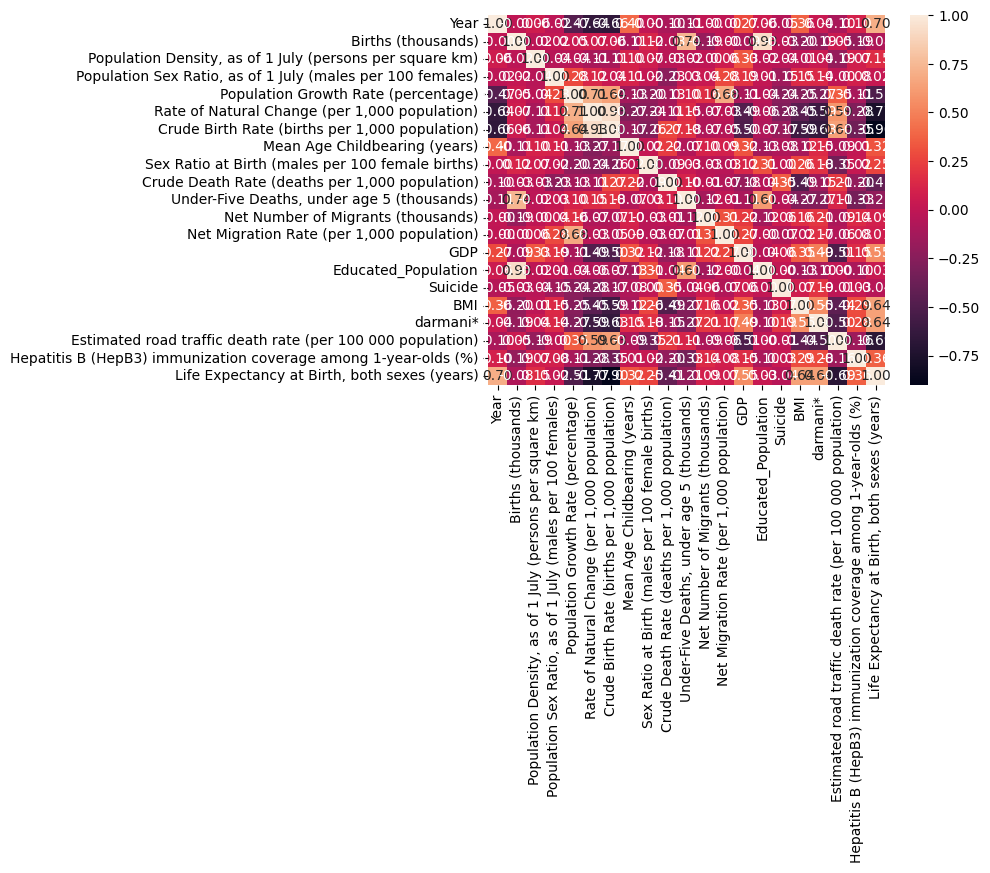

In [35]:
# correlation matrix
sns.heatmap(df_base_data.corr(), annot=True, fmt=".2f")

## ذخیره دیتا

In [36]:
# save data
df_base_data.to_csv('../../data/ML_Data/Data.csv', index=False)
df_2031.to_csv('../../data/ML_Data/Data_2031.csv', index=False)